In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

{0: [1, 2], 1: [6, 5], 6: [7], 7: [9, 1, 6, 8], 9: [4], 5: [3], 3: [8], 8: [9, 3]}


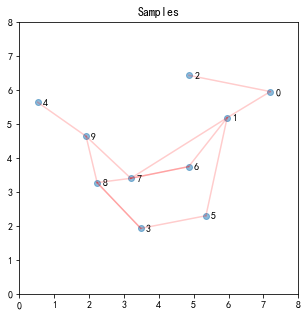

In [2]:
np.random.seed(43134)
x = np.random.rand(10, 2) * 5  + 1.5
x[0] += np.array([1, 0.5])
x[4] += np.array([-1, 1])

# 创建路线
graph = dict()
graph[0] = [1,2]
graph[1] = [6,5]
graph[6] = [7]
graph[7] = [9, 1, 6, 8]
graph[9] = [4]
graph[5] = [3]
graph[3] = [8]
graph[8] = [9, 3]
# graph[2] = [4]
print(graph)

# 地图线
plt.figure(figsize=(5, 5))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)

for k, vs in graph.items():
    for v in vs:
        x1, y1 = x[k]
        x2, y2 = x[v]
        plt.plot([x1, x2], [y1, y2], 'r-', alpha=0.2)

for i in range(len(x)):
    x1, y1 = x[i]
    plt.annotate(i, xy=(x1, y1), xytext=(x1+0.15, y1-0.1))

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

In [3]:
# 构建距离矩阵
n = len(x)
dis_map = np.zeros((n, n)) + np.inf
for i in range(n):
    dis_map[i][i] = 0

# 各点之间的距离矩阵
for k, vs in graph.items():
    for v in vs:
        x1,y1 = x[k]
        x2,y2 = x[v]
        dis = np.sqrt(np.power(x1-x2, 2) + np.power(y1-y2, 2))
        dis_map[k, v] = dis_map[v][k] = dis  

dis_map[7][1] = -1.25
dis_map[7][6] = -1.25
dis_map[7][8] = -1.25
dis_map[8][3] = 1.25

In [4]:
# 构建距离矩阵
n = len(x)
dis_map = np.zeros((n, n)) + np.inf
for i in range(n):
    dis_map[i][i] = 0

# 各点之间的距离矩阵
for k, vs in graph.items():
    for v in vs:
        x1,y1 = x[k]
        x2,y2 = x[v]
        dis = np.sqrt(np.power(x1-x2, 2) + np.power(y1-y2, 2))
        dis_map[k, v] = dis_map[v][k] = dis  

dis_map[7][1] = -1.25
dis_map[7][6] = -1.25
dis_map[7][8] = -1.25
dis_map[8][3] = 1.25
# print(f"dis_map = {dis_map}")


start = 0 # 起点
nodes = [i for i in range(n) if i!=start] # 节点
disls = dis_map[start].copy() # 起点到其余各点的距离
lnkls = [[start, i] for i in range(n)]
edges = list() # 边的数量
for u in graph:
    for v in graph[u]:
        edges.append((u, v, dis_map[u, v]))

count = 0
def bellman_ford():
    # for node in nodes: # node 没起到什么作用，就是对 edges 遍历 n-1 次，修改成 range(n-1) 也是成立的
    for i in range(n-1):
        for edge in edges: 
            u, v, w = edge # 从edge的角度出发，判断(start, u)和(start,v)之间，能否通过(u,v)直连距离优化最短路径
            global count
            count += 1
            if disls[v] > disls[u] + w:  # 其实就是判断 dis(start, v)>dis(start, u) + dis(u, v)
                disls[v] = disls[u] + w
                lnkls[v] = lnkls[u] + [v]
            pass
    return

bellman_ford()
# print(f"disls = {disls}")
# print(f"lnkls = {lnkls}")
# print(f"edges = {edges}")
print(f"count = {count}")

count = 126


In [5]:
import graphviz
f = graphviz.Digraph('points_graph', filename='points_graph', format="png")
f.attr(rankdir='LR', size='8,5')
f.attr('node', shape='doublecircle')
for node in graph:
    for node2 in graph[node]:
        f.edge(str(node), str(node2), label=f'{dis_map[node][node2].round(2)}')

for i in zip(lnkls, disls):
    print(i)

([0, 0], 0.0)
([0, 1], 1.4571179270728054)
([0, 2], 2.3796749082696893)
([0, 1, 6, 7, 8, 3], 4.964303581525024)
([0, 1, 6, 7, 8, 9, 4], 6.828241846250675)
([0, 1, 5], 4.406218061407023)
([0, 1, 6], 3.270471455366794)
([0, 1, 6, 7], 4.964303581525024)
([0, 1, 6, 7, 8], 3.714303581525024)
([0, 1, 6, 7, 8, 9], 5.11568810355875)


In [6]:
f.render("../img/2022-0214-1709-bellman_ford", format="png")

'..\\img\\2022-0214-1709-bellman_ford.png'

!['bellman_ford.png'](../img/2022-0214-1709-bellman_ford.png)